

```
                                                             QUESTION - A
```



```

#I. FCNN for classifying an image as an aeroplane, car or bird -
    Train an FCNN model using the Train samples and the following steps:

a. Write your own function to load the images from the Train dataset (Do not use any in-built function).

b. Print the size of the train set.

c. Visualise any four of the loaded train images using matplotlib.

d. Create a validation set containing only 10% images of the train set. Use the appropriate function from the sci-kit learn library.

e. Print the size of the new train set and the validation set.

f. Convert each of the 32 X 32 images (both in train and validation sets) into a vector of length 32*32 = 1024. Write your own lines of code and do not use any in-built function.

g. Normalise the vectorised images.

h. The architecture of the FCNN model should be as follows:

-
Three hidden layers having 256, 128, and 64 neurons,
respectively (The activation function for the hidden layers must
be “relu”).
-

The output layer that generates probabilities of a test image to belong to each of the given classes.

i. Train the model for 500 epochs with a batch size of 200. Use the loss function suitable for the classification task and “adam” as the optimization function.

j. Plot the epoch-wise training and validation accuracies in the same plot. The graph must have proper labels and legends.

```



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



```
a. Write your own function to load the images from the Train dataset (Do not use any in-built function).
```



In [ ]:
import zipfile


with zipfile.ZipFile('/new.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


for root, dirs, files in os.walk('data'):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"  Subdirectory: {dir_name}")
    for file_name in files:
        print(f"  File: {file_name}")


Directory: data
  Subdirectory: cifar-3class-data
Directory: data/cifar-3class-data
  Subdirectory: train
  Subdirectory: test
Directory: data/cifar-3class-data/train
  Subdirectory: 1
  Subdirectory: 0
  Subdirectory: 2
Directory: data/cifar-3class-data/train/1
  File: 1103.png
  File: 3781.png
  File: 4464.png
  File: 3273.png
  File: 2072.png
  File: 4560.png
  File: 2828.png
  File: 4917.png
  File: 4585.png
  File: 4803.png
  File: 3120.png
  File: 1946.png
  File: 1520.png
  File: 2795.png
  File: 4578.png
  File: 2445.png
  File: 454.png
  File: 2587.png
  File: 5014.png
  File: 3233.png
  File: 1599.png
  File: 5311.png
  File: 4909.png
  File: 561.png
  File: 2005.png
  File: 1356.png
  File: 4200.png
  File: 3659.png
  File: 1006.png
  File: 4993.png
  File: 2630.png
  File: 2600.png
  File: 304.png
  File: 2046.png
  File: 2101.png
  File: 136.png
  File: 1736.png
  File: 1153.png
  File: 4945.png
  File: 5207.png
  File: 4040.png
  File: 4050.png
  File: 134.png
  File: 823

In [ ]:

with zipfile.ZipFile('/new.zip', 'r') as zp_rf:
    zip_ref.extractall('data')


def ld_imgs(dirs):
    imgs, lbls = [], []
    cls_nms = ["0", "1", "2"]
    for idx, cls_nm in enumerate(cls_nms):
        cls_dir = os.path.join(dirs, cls_nm)
        for img_nm in os.listdir(cls_nm):
            img_pt = os.path.join(cls_dir, img_nm)
            img = Image.open(img_pt).resize((32, 32))
            imgs.append(np.array(img))
            lbls.append(idx)
    return np.array(imgs), np.array(lbls)


trn_imgs, trn_lbls = ld_imgs('data/cifar-3class-data/train')
tst_imgs, tst_lbls = ld_imgs('data/cifar-3class-data/test')




```
b. Print the size of the train set.
```




In [ ]:

print("Train set size:", trn_imgs.shape[0])

Train set size: 1500


```
c. Visualise any four of the loaded train images using matplotlib.
```

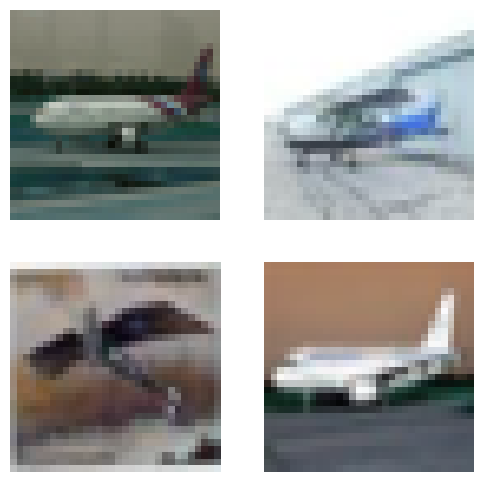

In [ ]:


plt.figure(figsize=(6, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(trn_imgs[i])
    plt.axis('off')
plt.show()




```
d. Create a validation set containing only 10% images of the train set. Use the appropriate function from the sci-kit learn library.
```



In [ ]:


trn_imgs, val_imgs, trn_lbls, val_lbls = train_test_split(
    trn_imgs, trn_lbls, test_size=0.1, random_state=42)



```
e. Print the size of the new train set and the validation set.
```



In [ ]:


print("New train set size:", trn_imgs.shape[0])
print("Validation set size:", val_imgs.shape[0])


New train set size: 1350
Validation set size: 150




```
f. Convert each of the 32 X 32 images (both in train and validation sets) into a vector of length 32*32 = 1024. Write your own lines
    of code and do not use any in-built function.
```



In [ ]:

trn_imgs = np.array([img.flatten() for img in trn_imgs])
val_imgs = np.array([img.flatten() for img in val_imgs])




```
g. Normalise the vectorised images.
```



In [ ]:

trn_imgs = trn_imgs / 255.0
val_imgs = val_imgs / 255.0




```
h. The architecture of the FCNN model should be as follows:

-
Three hidden layers having 256, 128, and 64 neurons,
respectively (The activation function for the hidden layers must
be “relu”).
-

The output layer that generates probabilities of a test image to belong to each of the given classes.
```





In [ ]:


model = Sequential([
    Dense(256, activation='relu', input_shape=(3072,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




```
i. Train the model for 500 epochs with a batch size of 200. Use the loss function suitable for the classification task and “adam” as
    the optimization function.
```



In [ ]:

hist = model.fit(trn_imgs, trn_lbls, epochs=500, batch_size=200, validation_data=(val_imgs, val_lbls))


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.3528 - loss: 1.3512 - val_accuracy: 0.3467 - val_loss: 1.1460
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3820 - loss: 1.1231 - val_accuracy: 0.4867 - val_loss: 0.9845
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5218 - loss: 0.9890 - val_accuracy: 0.5600 - val_loss: 0.9203
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6130 - loss: 0.9053 - val_accuracy: 0.6400 - val_loss: 0.8751
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6636 - loss: 0.8421 - val_accuracy: 0.6467 - val_loss: 0.8460
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6460 - loss: 0.8303 - val_accuracy: 0.6000 - val_loss: 0.8741
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6565 - loss: 0.8150 - val_accuracy: 0.6867 - val_loss: 0.7816
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6807 - loss: 0.7729 - val_accuracy: 0.6933 - val_loss: 0.767



```
j. Plot the epoch-wise training and validation accuracies in the same plot. The graph must have proper labels and legends.
```



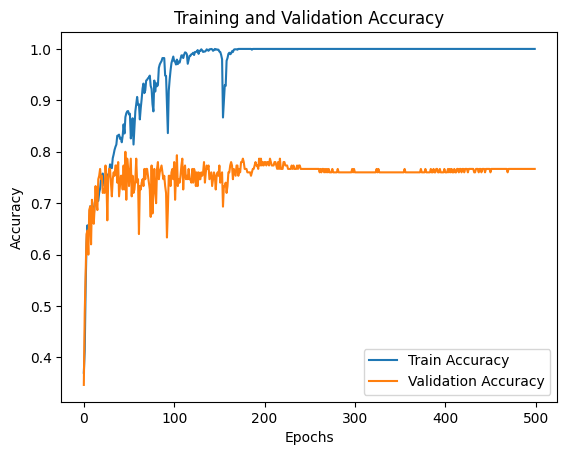

In [ ]:

# Step j: Plot training and validation accuracy
plt.plot(history.hist['accuracy'], label='Train Accuracy')
plt.plot(history.hist['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()




```

II.Test the above model using the Test samples and the following steps:

a. Use your function, defined above to load the images from the Test dataset.
b. Convert each of the 32 X 32 images into a vector of length 32*32 = 1024. Reuse the codes you already have written during training..
c. Normalise the vectorised images (like as above).
d. Use these preprocessed vectorised images to evaluate the model.
e. Print the test loss and accuracy (%).



```





```

a. Use your function, defined above to load the images from the Test dataset.

```



In [ ]:

tst_imgs, tst_lbls = ld_imgs('data/cifar-3class-data/test')




```
b. Convert each of the 32 X 32 images into a vector of length 32*32 = 1024. Reuse the codes you already have written during training..
```



In [ ]:

tst_imgs = tst_imgs.reshape(tst_imgs.shape[0], -1)




```
c. Normalise the vectorised images (like as above).
```



In [ ]:

tst_imgs = tst_imgs / 255.0




```
d. Use these preprocessed vectorised images to evaluate the model.
```



In [ ]:

tst_lss, tst_acc = model.evaluate(tst_imgs, tst_lbls, verbose=0)




```
e. Print the test loss and accuracy (%).
```



In [ ]:

print(f"Test Loss: {tst_lss:.4f}")
print(f"Test Accuracy: {tst_acc * 100:.2f}%")


Test Loss: 2.8864
Test Accuracy: 73.33%




```
----------------------------------------------------------------------------------------------------------------------------------------------
```





```
                                                            QUESTION - B  
```





```
B.CNN for classifying an image as an aeroplane, car or bird -

I.Train a CNN model using the given Train samples and the following steps:          

a. Load the images from the Train dataset using the function you already defined for FCNN task.

b. Create a validation set containing only 10% images of the train set as you have done for FCNN task.

c. Normalise the images (apply the same method as previos).  

d. The architecture of the CNN model should be as follows:

- Two consecutive convolutional layers each having 64 filters of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature maps (output of the second convolution layer) to half.
- Two consecutive convolutional layers each having 128 filters of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature maps (output of the fourth convolution layer) to half.
- A flattening layer to vectorise the feature tensor (a matrix of more than two dimensions).
- Two fully connected layers having 512 and 100 neurons, respectively.
- One fully connected layer serving as the output layer.

NOTE: 1. Activation functions for the layers should be “relu”.
2. Padding for the convolutional layers must be “same” and “valid” for the maxpooling layers.

e. Train the model for 50 epochs with a batch size of 200. Use the loss function suitable for the classification task and “adam” as the optimization function.
f. Save the model.
g. Plot the epoch-wise training and validation accuracies in the same plot. The graph must have proper labels and legends.

```





```
a. Load the images from the Train dataset using the function you already defined for FCNN task.
```



In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

trn_imgs, trn_lbls = ld_imgs('data/cifar-3class-data/train')




```
b. Create a validation set containing only 10% images of the train set as you have done for FCNN task.
```



In [ ]:

trn_imgs, val_imgs, trn_lbls, val_lbls = train_test_split(
    trn_imgs, trn_lbls, test_size=0.1, random_state=42
)




```
c. Normalise the images (apply the same method as previos).  
```



In [ ]:

trn_imgs, val_imgs = trn_imgs / 255.0, val_imgs / 255.0




```

d. The architecture of the CNN model should be as follows:

- Two consecutive convolutional layers each having 64 filters of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature maps (output of the second convolution layer) to half.
- Two consecutive convolutional layers each having 128 filters of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature maps (output of the fourth convolution layer) to half.
- A flattening layer to vectorise the feature tensor (a matrix of more than two dimensions).
- Two fully connected layers having 512 and 100 neurons, respectively.
- One fully connected layer serving as the output layer.

NOTE: 1. Activation functions for the layers should be “relu”.
2. Padding for the convolutional layers must be “same” and “valid” for the maxpooling layers.


```



In [ ]:

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='valid'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='valid'),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




```
e. Train the model for 50 epochs with a batch size of 200. Use the loss function suitable for the classification task and “adam” as the optimization function.
```



In [ ]:

hist = model.fit(trn_imgs, trn_lbls, epochs=50, batch_size=200, validation_data=(val_imgs, val_lbls))


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 756ms/step - accuracy: 0.3472 - loss: 1.1274 - val_accuracy: 0.2733 - val_loss: 1.0955
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4763 - loss: 1.0198 - val_accuracy: 0.6400 - val_loss: 0.8395
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6316 - loss: 0.8794 - val_accuracy: 0.6600 - val_loss: 0.7858
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6812 - loss: 0.7650 - val_accuracy: 0.7533 - val_loss: 0.6642
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7272 - loss: 0.6586 - val_accuracy: 0.7600 - val_loss: 0.6152
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7646 - loss: 0.5595 - val_accuracy: 0.7600 - val_loss: 0.5479
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8059 - loss: 0.4895 - val_accuracy: 0.8067 - val_loss: 0.4920
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7952 - loss: 0.4815 - val_accuracy: 0.8133 - val_loss: 0.543



```
f. Save the model.
```



In [ ]:

model.save('cnn_model.h5')




```
g. Plot the epoch-wise training and validation accuracies in the same plot. The graph must have proper labels and legends.
```



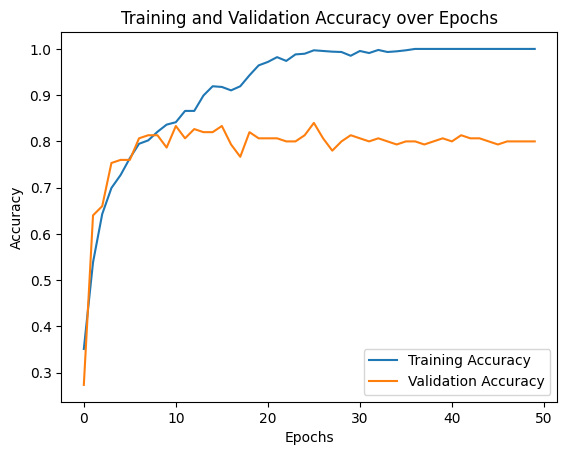

In [ ]:

plt.plot(history.hist['accuracy'], label='Training Accuracy')
plt.plot(history.hist['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()




```
---------------------------------------------------------------------------------------------------------------------------------------------
```





```
II. Test the above model using the Test samples and the following steps:

a. Use your function, defined above to load the images from the Test dataset

b. Normalise the images (like as above).

c. Load the saved Model.

d. Predict the class probabilities of the preprocessed images using the loaded model. The output of this step must be a 300 X 3 matrix, each row containing the three class probabilities for an test image.

e. Find the predicted class of an image by probability.

f. Compute and display the confusion matrix using the predicted and actual class labels of the test images.

h. Print the test accuracy (%) of the model.
```





```
II. Test the above model using the Test samples and the following steps:

a. Use your function, defined above to load the images from the Test dataset

```



In [ ]:

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

tst_imgs, tst_lbls = ld_imgs('data/cifar-3class-data/test')




```
b. Normalise the images (like as above).
```



In [ ]:

tst_imgs = tst_imgs / 255.0




```
c. Load the saved Model
```



In [ ]:

model = load_model('cnn_model.h5')




```
d. Predict the class probabilities of the preprocessed images using the loaded model. The output of this step must be a 300 X 3 matrix, each row containing the three class probabilities for an test image.
```



In [ ]:

preds = model.predict(tst_imgs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step




```
e. Find the predicted class of an image as:  
```



In [ ]:

pred_clsss = np.argmax(preds, axis=1)




```
f. Compute and display the confusion matrix using the predicted and actual class labels of the test images.
```



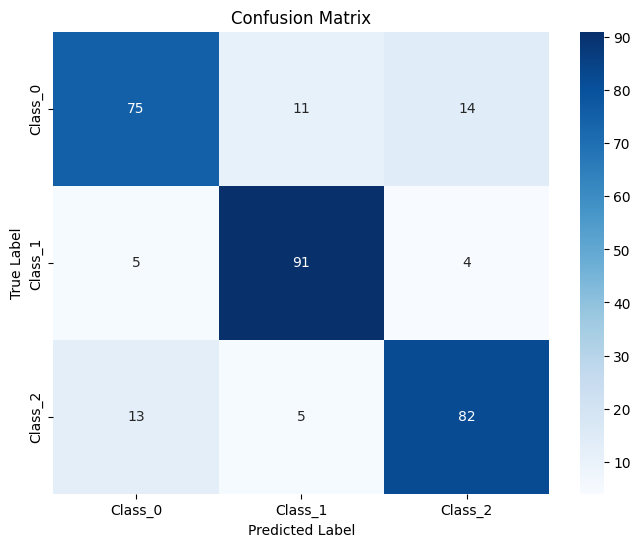

In [ ]:

cof_mat = confusion_matrix(tst_lbls, pred_clsss)
plt.figure(figsize=(8, 6))
sns.heatmap(cof_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Class_0', 'Class_1', 'Class_2'], yticklabels=['Class_0', 'Class_1', 'Class_2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




```
h. Print the test accuracy (%) of the model.
```



In [ ]:

tst_acc = accuracy_score(tst_lbls, pred_clsss)
print(f"Test Accuracy: {tst_acc * 100:.2f}%")


Test Accuracy: 82.67%




```
------------------------------------------------------------------------------------------------------------------------------
```

